In [1]:
import os
import sys

path = os.path.abspath(os.path.join(os.getcwd(), '..'))  # get the parent directory
sys.path.append(path)  # set the current working directory to the parent directory



In [2]:

from lpball import LpBall
from ellipsoid import Ellipsoid
from parallelepiped import Parallelepiped
from inscribed_bodies import ParallelepipedInscribedInEllipsoid as piie
from inscribed_bodies import ParallelepipedInscribedInLpBall as piilpb


In [3]:

from scipy.integrate import nquad, dblquad

In [4]:
# Here we are testing multiple integrals that we shall use for computing the hypersurface area of an ellipsoid
def f(x,y,z):
    return x**2 + y**3 + z

nquad(f, [[0, 1], [1, 2], [1, 4]])

(19.750000000000004, 2.1926904736346847e-13)

$\ell_p$-balls in $\mathbb R^n$.

In [5]:
n, p, radius = 4, 57, 1
lp_ball = LpBall(n, p, radius)
point_on_surface = lp_ball.sample_points_on_surface()
print(f"Initial point: {point_on_surface}")
print("Is point on surface?", lp_ball.is_point_on_surface(point_on_surface, radius))

best_parallelepiped = piilpb.maximize_edge_circumference(lp_ball, origin = point_on_surface)
print("Best inscribed parallelepiped:", best_parallelepiped)
print(f"Is point a vertex? {best_parallelepiped.is_vertex(point_on_surface)}")

print("Total edge circumference:", best_parallelepiped.total_edge_circumference())

Initial point: [-0.41484277 -0.08046859 -0.75889551  1.        ]
Is point on surface? True
Best inscribed parallelepiped: Parallelepiped(vertices=[[-0.41 -0.08 -0.76 1.00]
 [-0.41 -0.08 -0.76 2.00]
 [-0.41 -0.08 0.24 1.00]
 [-0.41 -0.08 0.24 2.00]
 [-0.41 0.92 -0.76 1.00]
 [-0.41 0.92 -0.76 2.00]
 [-0.41 0.92 0.24 1.00]
 [-0.41 0.92 0.24 2.00]
 [0.59 -0.08 -0.76 1.00]
 [0.59 -0.08 -0.76 2.00]
 [0.59 -0.08 0.24 1.00]
 [0.59 -0.08 0.24 2.00]
 [0.59 0.92 -0.76 1.00]
 [0.59 0.92 -0.76 2.00]
 [0.59 0.92 0.24 1.00]
 [0.59 0.92 0.24 2.00]], origin=[-0.41484277 -0.08046859 -0.75889551  1.        ])
Is point a vertex? True
Total edge circumference: 32.0


In [6]:
vertices = best_parallelepiped.get_vertices()

In [7]:
radii = [2, 1, 34]
ellipsoid = Ellipsoid(radii)

Excecute the following piece of code that uses random points on the ellipsoid surface.

In [8]:
point_on_surface = ellipsoid.sample_points_on_surface(1)[0]
print(f"Initial point: {point_on_surface}")
print(f"Is point on surface? {ellipsoid.is_point_on_surface(point_on_surface)}")

best_parallelepiped_for_area = piie.maximize_surface_area(radii, origin = point_on_surface)
print(f"Is point a vertex? {best_parallelepiped_for_area.is_vertex(point_on_surface)}")
surface_area = best_parallelepiped_for_area.hypersurface_measure(2)
print(f"Best inscribed parallelepiped for area: {best_parallelepiped_for_area}")
print(f"Surface area: {surface_area}")


best_parallelepiped_for_circumference = piie.maximize_edge_circumference(radii, origin = point_on_surface)
print(f"Is point a vertex? {best_parallelepiped_for_circumference.is_vertex(point_on_surface)}")
total_edge_circumference = best_parallelepiped_for_circumference.total_edge_circumference()
print(f"Best inscribed parallelepiped for circumference: {best_parallelepiped_for_circumference}")
print(f"Total edge circumference: {total_edge_circumference}", )




Initial point: [-1.96898366  0.08670262 -5.18525042]
Is point on surface? True
Is point a vertex? True
Best inscribed parallelepiped for area: Parallelepiped(vertices=[[-1.97 0.09 -5.19]
 [9.35 -0.66 -37.24]
 [-1.24 0.72 -4.94]
 [10.08 -0.02 -36.99]
 [-0.78 -1.46 -4.73]
 [10.54 -2.20 -36.78]
 [-0.05 -0.82 -4.49]
 [11.27 -1.56 -36.54]], origin=[-1.96898366  0.08670262 -5.18525042])
Surface area: 104.00000280151713
Is point a vertex? True
Best inscribed parallelepiped for circumference: Parallelepiped(vertices=[[-1.97 0.09 -5.19]
 [2.79 0.28 28.48]
 [-1.88 0.08 -4.19]
 [2.88 0.28 29.47]
 [-1.67 -0.07 -3.21]
 [3.09 0.13 30.45]
 [-1.58 -0.07 -2.22]
 [3.18 0.13 31.45]], origin=[-1.96898366  0.08670262 -5.18525042])
Total edge circumference: 222.00002782471017


In [9]:
vertices = best_parallelepiped_for_circumference.get_vertices()
vertices

array([[-1.96898366,  0.08670262, -5.18525042],
       [ 2.7948798 ,  0.28107109, 28.47879267],
       [-1.88006071,  0.08396713, -4.18920982],
       [ 2.88380274,  0.2783356 , 29.47483327],
       [-1.67098857, -0.06571044, -3.21345781],
       [ 3.09287488,  0.12865803, 30.45058528],
       [-1.58206563, -0.06844594, -2.2174172 ],
       [ 3.18179782,  0.12592253, 31.44662589]])

In [10]:
Parallelepiped.is_parallelepiped(vertices)

True

In [11]:
Parallelepiped.parallelepiped_circumference(vertices)

222.00002782471017

In [12]:
inscribed_parallelepiped = piie([3, 2, 1])

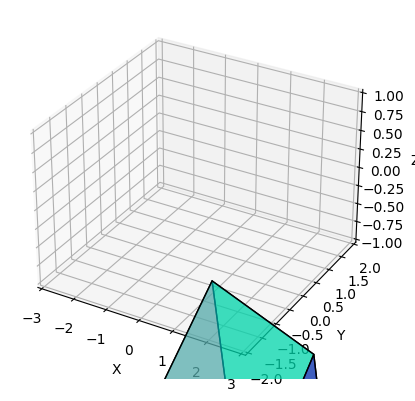

<Figure size 640x480 with 0 Axes>

In [13]:
inscribed_parallelepiped.plot(None)